In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/smart-farming-sensor-data-for-yield-prediction/Smart_Farming_Crop_Yield_2024.csv


In [1]:
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


## Title: 🌾 Smart Farming: Sensor Data for Yield Prediction

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


## Description:
Leverage IoT sensor data to predict crop yields, optimize farming practices, and enhance agricultural productivity.

## Import dataset

In [2]:
df = pd.read_csv('/kaggle/input/smart-farming-sensor-data-for-yield-prediction/Smart_Farming_Crop_Yield_2024.csv')

In [3]:
df.head()

,farm_id,region,crop_type,soil_moisture_%,soil_pH,temperature_C,rainfall_mm,humidity_%,sunlight_hours,irrigation_type,...,sowing_date,harvest_date,total_days,yield_kg_per_hectare,sensor_id,timestamp,latitude,longitude,NDVI_index,crop_disease_status
0,FARM0001,North India,Wheat,35.95,5.99,17.79,75.62,77.03,7.27,NaN,...,2024-01-08,2024-05-09,122,4408.07,SENS0001,2024-03-19,14.970941,82.997689,0.63,Mild
1,FARM0002,South USA,Soybean,19.74,7.24,30.18,89.91,61.13,5.67,Sprinkler,...,2024-02-04,2024-05-26,112,5389.98,SENS0002,2024-04-21,16.613022,70.869009,0.58,NaN
2,FARM0003,South USA,Wheat,29.32,7.16,27.37,265.43,68.87,8.23,Drip,...,2024-02-03,2024-06-26,144,2931.16,SENS0003,2024-02-28,19.503156,79.068206,0.80,Mild
3,FARM0004,Central USA,Maize,17.33,6.03,33.73,212.01,70.46,5.03,Sprinkler,...,2024-02-21,2024-07-04,134,4227.80,SENS0004,2024-05-14,31.071298,85.519998,0.44,NaN
4,FARM0005,Central USA,Cotton,19.37,5.92,33.86,269.09,55.73,7.93,NaN,...,2024-02-05,2024-05-20,105,4979.96,SENS0005,2024-04-13,16.568540,81.691720,0.84,Severe


In [4]:
df.tail()

,farm_id,region,crop_type,soil_moisture_%,soil_pH,temperature_C,rainfall_mm,humidity_%,sunlight_hours,irrigation_type,...,sowing_date,harvest_date,total_days,yield_kg_per_hectare,sensor_id,timestamp,latitude,longitude,NDVI_index,crop_disease_status
495,FARM0496,Central USA,Rice,42.85,6.70,30.85,52.35,79.58,7.25,Manual,...,2024-01-16,2024-06-02,138,4251.40,SENS0496,2024-05-08,30.386623,76.147700,0.59,Mild
496,FARM0497,North India,Soybean,34.22,6.75,17.46,256.23,45.14,5.78,NaN,...,2024-01-01,2024-04-14,104,3708.54,SENS0497,2024-01-19,18.832748,75.736924,0.85,Severe
497,FARM0498,North India,Cotton,15.93,5.72,17.03,288.96,57.87,7.69,Drip,...,2024-01-02,2024-05-09,128,2604.41,SENS0498,2024-04-20,23.262016,81.992230,0.71,Mild
498,FARM0499,Central USA,Soybean,38.61,6.20,17.08,279.06,73.09,9.60,Drip,...,2024-01-25,2024-06-04,131,2586.36,SENS0499,2024-03-02,19.764989,84.426869,0.77,Severe
499,FARM0500,North India,Wheat,30.22,7.42,20.57,72.61,89.74,5.09,NaN,...,2024-02-16,2024-06-29,134,5891.40,SENS0500,2024-05-11,13.455532,88.880605,0.85,Severe


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   farm_id               500 non-null    object 
 1   region                500 non-null    object 
 2   crop_type             500 non-null    object 
 3   soil_moisture_%       500 non-null    float64
 4   soil_pH               500 non-null    float64
 5   temperature_C         500 non-null    float64
 6   rainfall_mm           500 non-null    float64
 7   humidity_%            500 non-null    float64
 8   sunlight_hours        500 non-null    float64
 9   irrigation_type       350 non-null    object 
 10  fertilizer_type       500 non-null    object 
 11  pesticide_usage_ml    500 non-null    float64
 12  sowing_date           500 non-null    object 
 13  harvest_date          500 non-null    object 
 14  total_days            500 non-null    int64  
 15  yield_kg_per_hectare  5

In [6]:
df.describe()

,soil_moisture_%,soil_pH,temperature_C,rainfall_mm,humidity_%,sunlight_hours,pesticide_usage_ml,total_days,yield_kg_per_hectare,latitude,longitude,NDVI_index
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,26.750140,6.523980,24.675740,181.685740,65.194460,7.03014,26.586980,119.496000,4032.92694,22.442473,80.392248,0.602060
std,10.150053,0.585558,5.348899,72.293091,14.642849,1.69167,13.202429,16.798046,1174.43304,7.283492,5.910664,0.175402
min,10.160000,5.510000,15.000000,50.170000,40.230000,4.01000,5.050000,90.000000,2023.56000,10.004243,70.020021,0.300000
25%,17.890000,6.030000,20.295000,119.217500,51.865000,5.66750,14.945000,105.750000,2994.82000,16.263202,75.374713,0.447500
50%,25.855000,6.530000,24.655000,191.545000,65.685000,6.99500,25.980000,119.000000,4071.69000,21.981743,80.650284,0.610000
75%,36.022500,7.040000,29.090000,239.035000,77.995000,8.47000,38.005000,134.000000,5062.11000,28.528948,85.654629,0.750000
max,44.980000,7.500000,34.840000,298.960000,90.000000,10.00000,49.940000,150.000000,5998.29000,34.981531,89.991901,0.900000


In [7]:
df.isnull().sum()

farm_id                   0
region                    0
crop_type                 0
soil_moisture_%           0
soil_pH                   0
temperature_C             0
rainfall_mm               0
humidity_%                0
sunlight_hours            0
irrigation_type         150
fertilizer_type           0
pesticide_usage_ml        0
sowing_date               0
harvest_date              0
total_days                0
yield_kg_per_hectare      0
sensor_id                 0
timestamp                 0
latitude                  0
longitude                 0
NDVI_index                0
crop_disease_status     130
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.shape

(500, 22)

In [10]:
df.dtypes

farm_id                  object
region                   object
crop_type                object
soil_moisture_%         float64
soil_pH                 float64
temperature_C           float64
rainfall_mm             float64
humidity_%              float64
sunlight_hours          float64
irrigation_type          object
fertilizer_type          object
pesticide_usage_ml      float64
sowing_date              object
harvest_date             object
total_days                int64
yield_kg_per_hectare    float64
sensor_id                object
timestamp                object
latitude                float64
longitude               float64
NDVI_index              float64
crop_disease_status      object
dtype: object

In [11]:
df.columns

Index(['farm_id', 'region', 'crop_type', 'soil_moisture_%', 'soil_pH',
       'temperature_C', 'rainfall_mm', 'humidity_%', 'sunlight_hours',
       'irrigation_type', 'fertilizer_type', 'pesticide_usage_ml',
       'sowing_date', 'harvest_date', 'total_days', 'yield_kg_per_hectare',
       'sensor_id', 'timestamp', 'latitude', 'longitude', 'NDVI_index',
       'crop_disease_status'],
      dtype='object')

## Data visualizations

In [12]:
# Setup
sns.set(style="whitegrid", palette="muted")
plt.rcParams["figure.figsize"] = (10, 6)

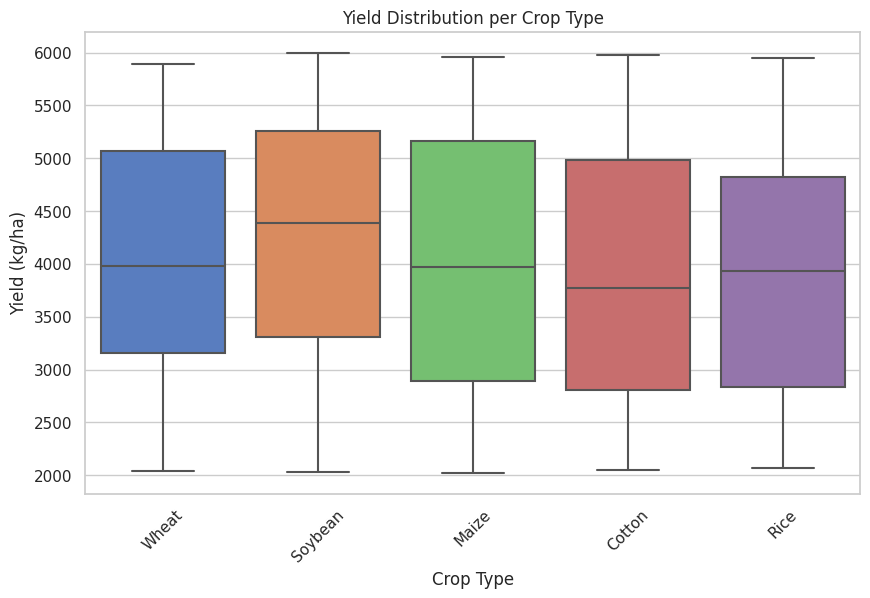

In [13]:
sns.boxplot(data=df, x='crop_type', y='yield_kg_per_hectare')
plt.xticks(rotation=45)
plt.title("Yield Distribution per Crop Type")
plt.ylabel("Yield (kg/ha)")
plt.xlabel("Crop Type")
plt.show()


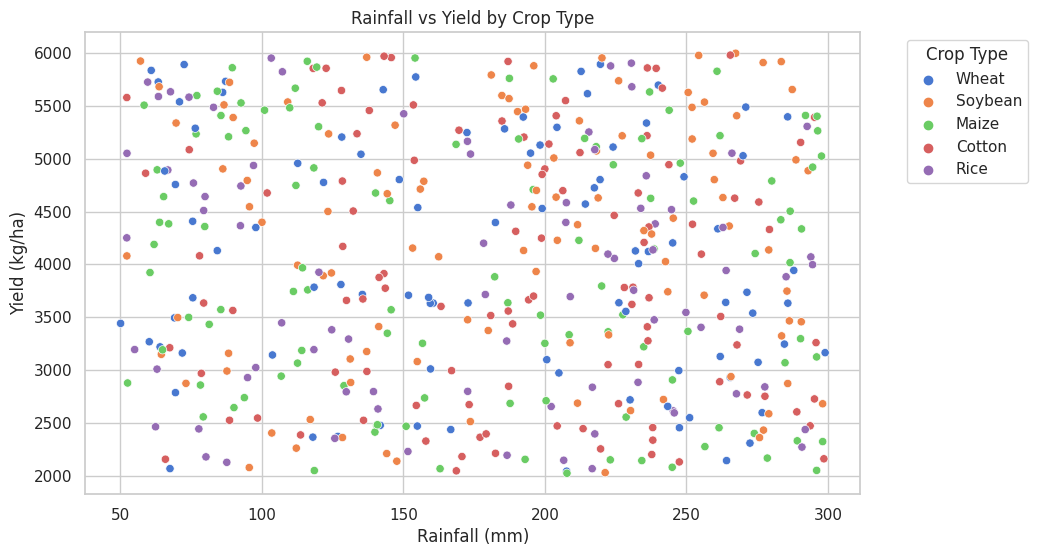

In [14]:
sns.scatterplot(data=df, x='rainfall_mm', y='yield_kg_per_hectare', hue='crop_type')
plt.title("Rainfall vs Yield by Crop Type")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Yield (kg/ha)")
plt.legend(title="Crop Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


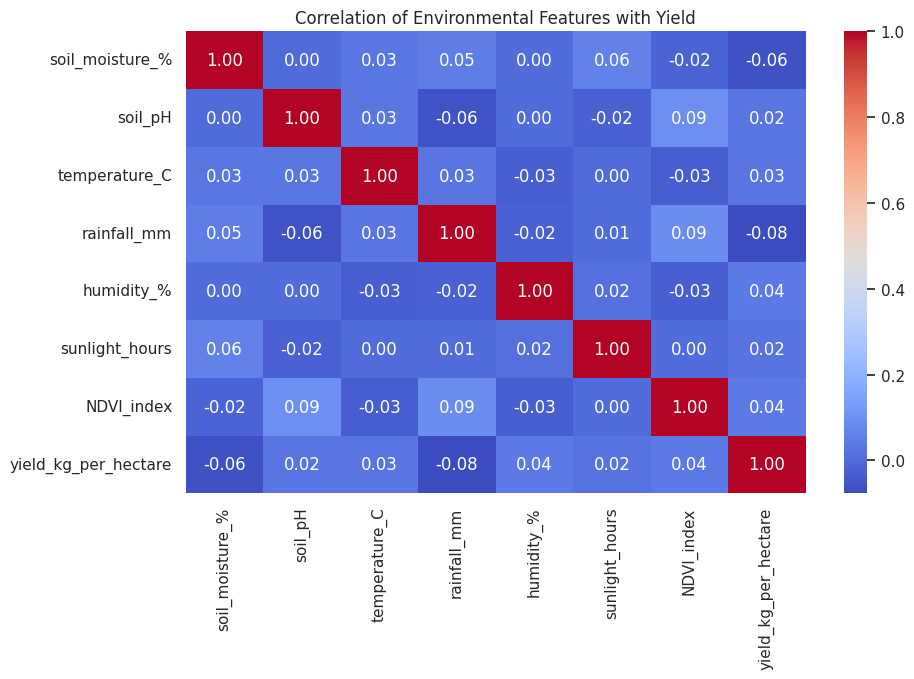

In [15]:
env_features = ['soil_moisture_%', 'soil_pH', 'temperature_C', 'rainfall_mm',
                'humidity_%', 'sunlight_hours', 'NDVI_index', 'yield_kg_per_hectare']
corr_matrix = df[env_features].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation of Environmental Features with Yield")
plt.show()


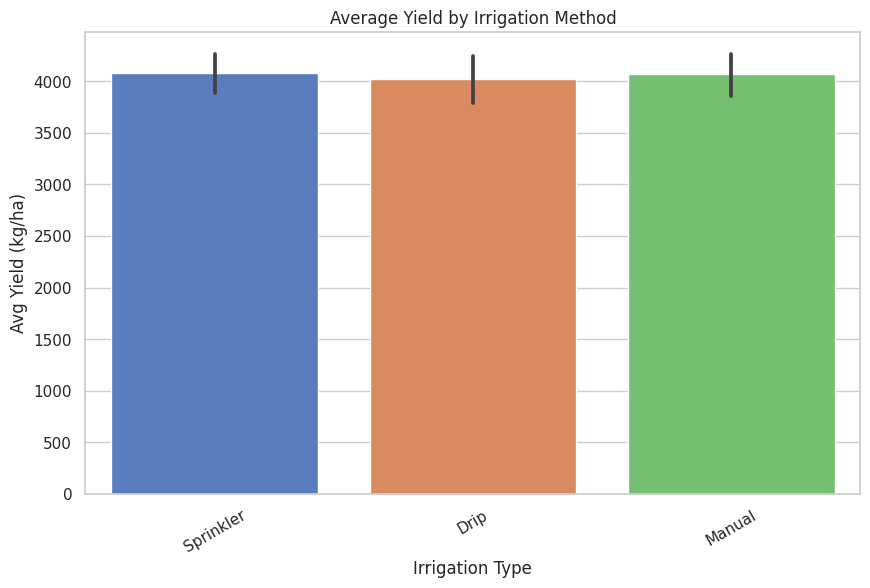

In [16]:
sns.barplot(data=df, x='irrigation_type', y='yield_kg_per_hectare', estimator='mean')
plt.title("Average Yield by Irrigation Method")
plt.ylabel("Avg Yield (kg/ha)")
plt.xlabel("Irrigation Type")
plt.xticks(rotation=30)
plt.show()


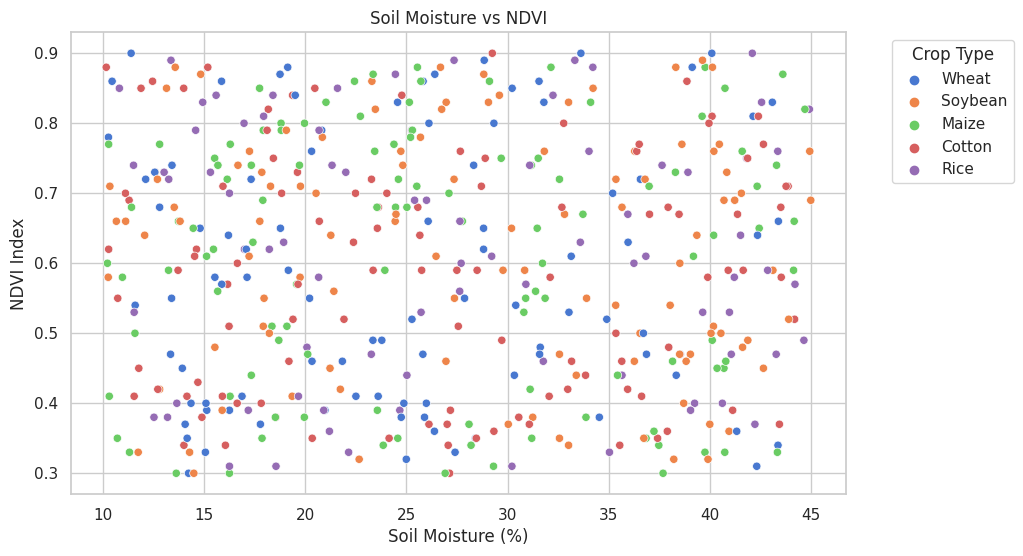

In [17]:
sns.scatterplot(data=df, x='soil_moisture_%', y='NDVI_index', hue='crop_type')
plt.title("Soil Moisture vs NDVI")
plt.xlabel("Soil Moisture (%)")
plt.ylabel("NDVI Index")
plt.legend(title="Crop Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


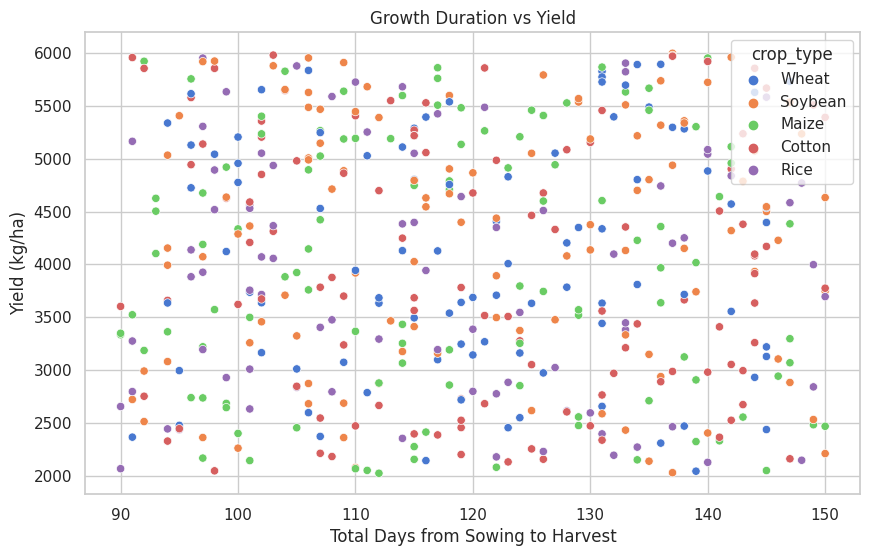

In [18]:
sns.scatterplot(data=df, x='total_days', y='yield_kg_per_hectare', hue='crop_type')
plt.title("Growth Duration vs Yield")
plt.xlabel("Total Days from Sowing to Harvest")
plt.ylabel("Yield (kg/ha)")
plt.show()


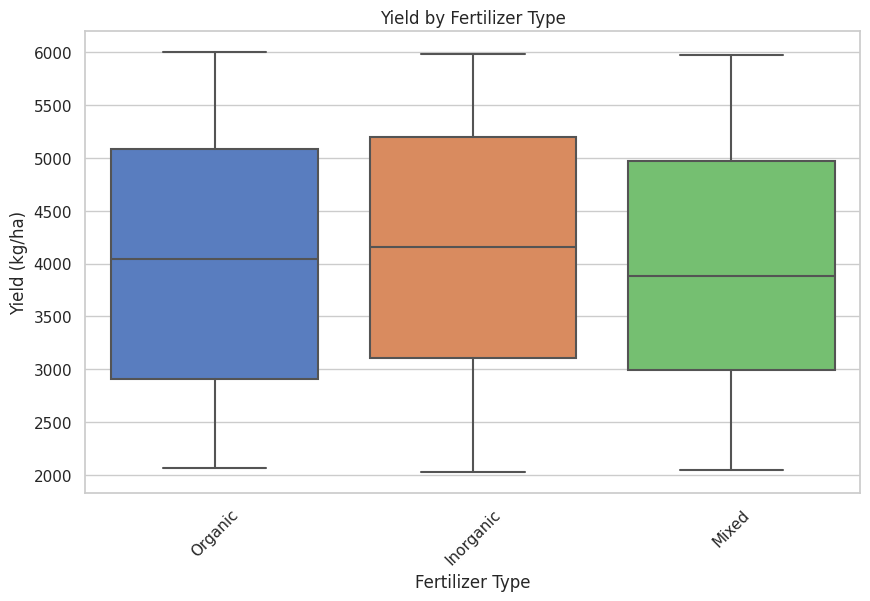

In [19]:
sns.boxplot(data=df, x='fertilizer_type', y='yield_kg_per_hectare')
plt.title("Yield by Fertilizer Type")
plt.ylabel("Yield (kg/ha)")
plt.xlabel("Fertilizer Type")
plt.xticks(rotation=45)
plt.show()


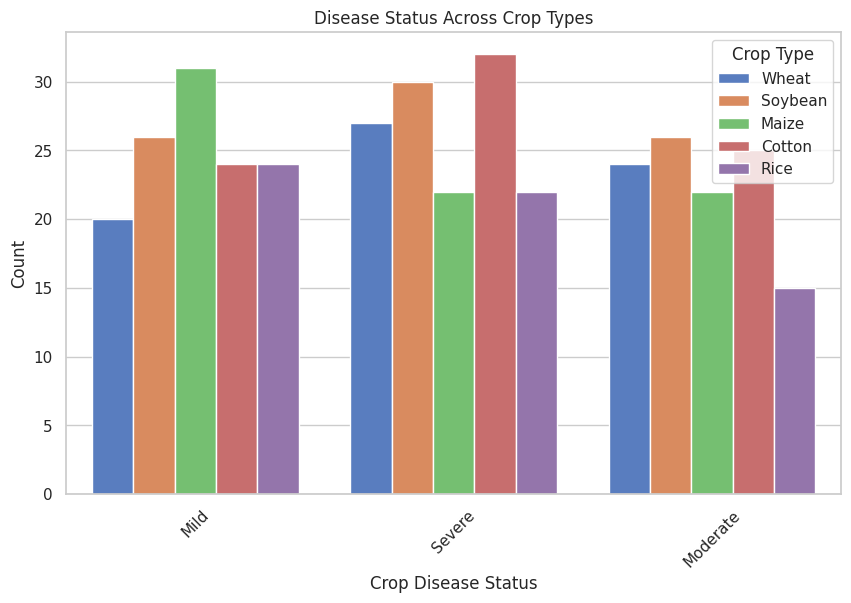

In [20]:
sns.countplot(data=df, x='crop_disease_status', hue='crop_type')
plt.title("Disease Status Across Crop Types")
plt.xlabel("Crop Disease Status")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Crop Type")
plt.show()


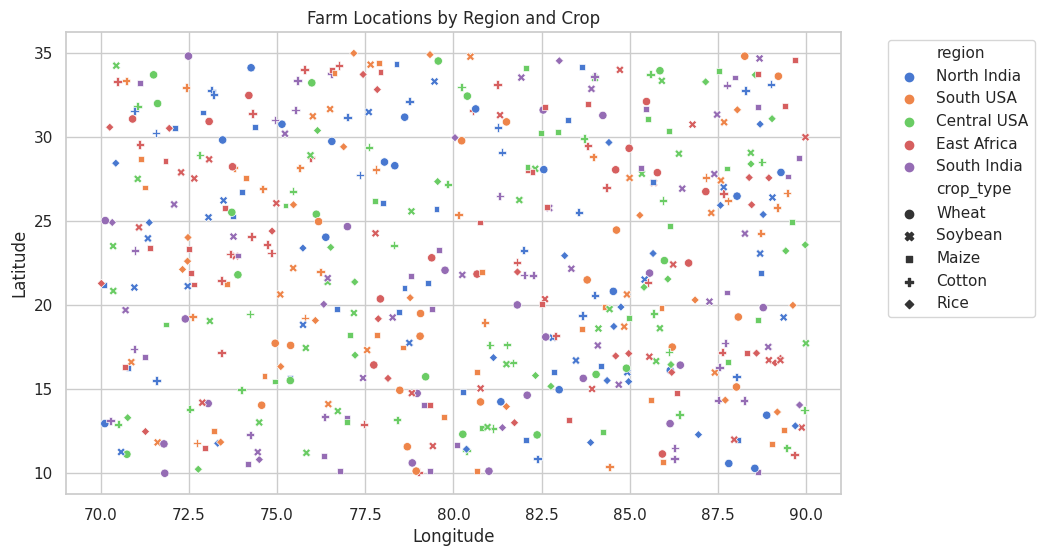

In [21]:
sns.scatterplot(data=df, x='longitude', y='latitude', hue='region', style='crop_type')
plt.title("Farm Locations by Region and Crop")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## Predictive modeling

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [23]:
# Drop irrelevant and non-numeric columns for classification
df_cleaned = df.drop(columns=[
    'sowing_date', 'harvest_date', 'sensor_id', 'timestamp', 'farm_id'
])

# Encode categorical columns
cat_cols = ['region', 'crop_type', 'irrigation_type', 'fertilizer_type']
label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le

# Encode target
df_cleaned['crop_disease_status'] = LabelEncoder().fit_transform(df_cleaned['crop_disease_status'])

# Drop missing values
df_cleaned = df_cleaned.dropna()

# Define features and target
X = df_cleaned.drop(columns='crop_disease_status')
y = df_cleaned['crop_disease_status']

# Ensure all remaining columns are numeric
print(X.dtypes)

# Apply scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


region                    int64
crop_type                 int64
soil_moisture_%         float64
soil_pH                 float64
temperature_C           float64
rainfall_mm             float64
humidity_%              float64
sunlight_hours          float64
irrigation_type           int64
fertilizer_type           int64
pesticide_usage_ml      float64
total_days                int64
yield_kg_per_hectare    float64
latitude                float64
longitude               float64
NDVI_index              float64
dtype: object


In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


--- Logistic Regression ---
Accuracy: 0.2
Classification Report:
              precision    recall  f1-score   support

           0       0.15      0.20      0.17        25
           1       0.18      0.09      0.12        22
           2       0.25      0.30      0.27        27
           3       0.21      0.19      0.20        26

    accuracy                           0.20       100
   macro avg       0.20      0.19      0.19       100
weighted avg       0.20      0.20      0.19       100



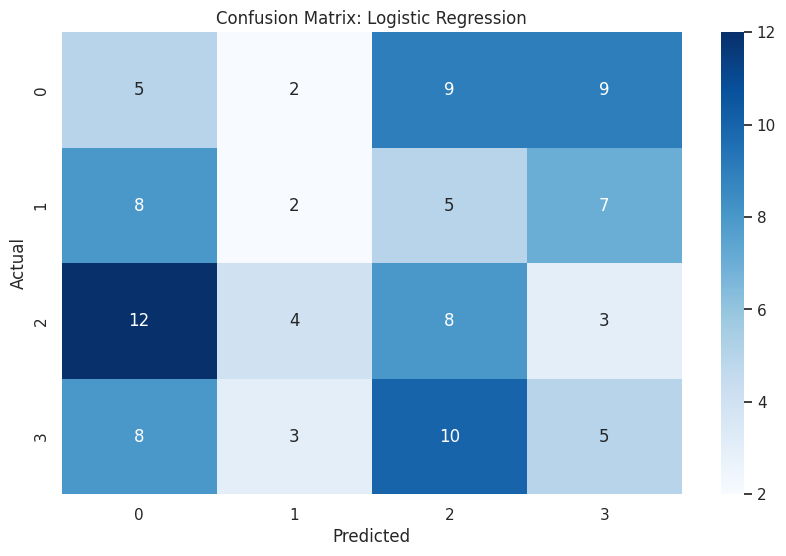

--- Random Forest ---
Accuracy: 0.27
Classification Report:
              precision    recall  f1-score   support

           0       0.16      0.16      0.16        25
           1       0.43      0.27      0.33        22
           2       0.34      0.44      0.39        27
           3       0.19      0.19      0.19        26

    accuracy                           0.27       100
   macro avg       0.28      0.27      0.27       100
weighted avg       0.28      0.27      0.27       100



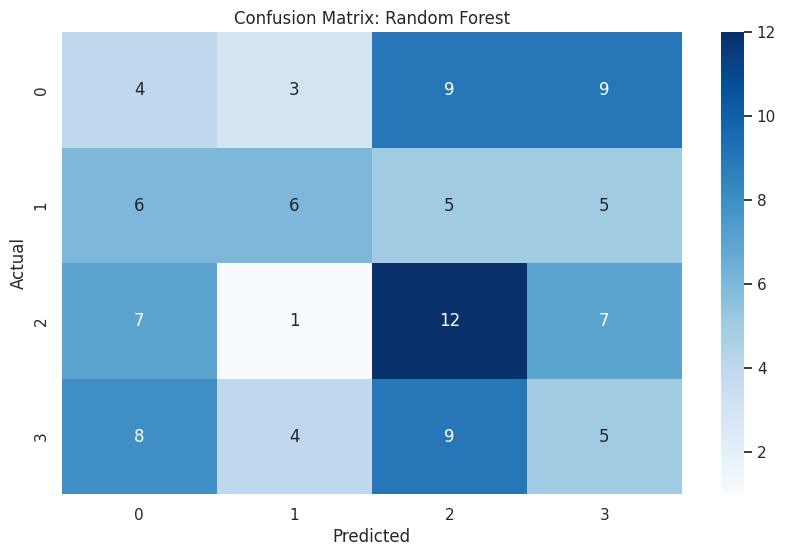

--- Decision Tree ---
Accuracy: 0.21
Classification Report:
              precision    recall  f1-score   support

           0       0.27      0.28      0.27        25
           1       0.15      0.14      0.14        22
           2       0.19      0.22      0.20        27
           3       0.23      0.19      0.21        26

    accuracy                           0.21       100
   macro avg       0.21      0.21      0.21       100
weighted avg       0.21      0.21      0.21       100



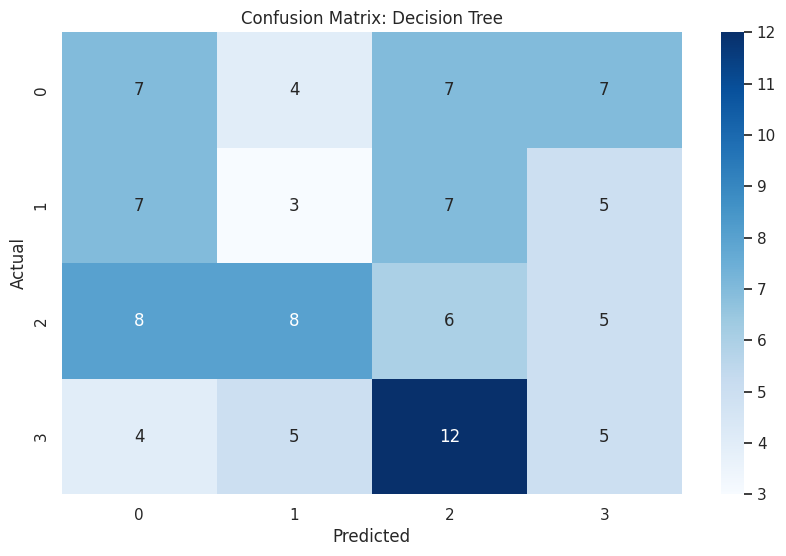

--- SVM ---
Accuracy: 0.19
Classification Report:
              precision    recall  f1-score   support

           0       0.14      0.16      0.15        25
           1       0.33      0.09      0.14        22
           2       0.20      0.33      0.25        27
           3       0.19      0.15      0.17        26

    accuracy                           0.19       100
   macro avg       0.22      0.18      0.18       100
weighted avg       0.21      0.19      0.18       100



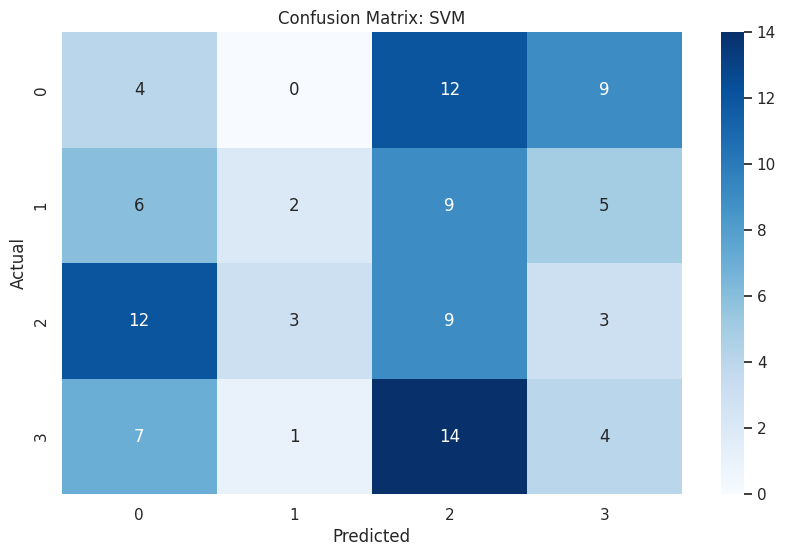

--- KNN ---
Accuracy: 0.22
Classification Report:
              precision    recall  f1-score   support

           0       0.22      0.32      0.26        25
           1       0.32      0.32      0.32        22
           2       0.14      0.15      0.15        27
           3       0.23      0.12      0.15        26

    accuracy                           0.22       100
   macro avg       0.23      0.23      0.22       100
weighted avg       0.22      0.22      0.21       100



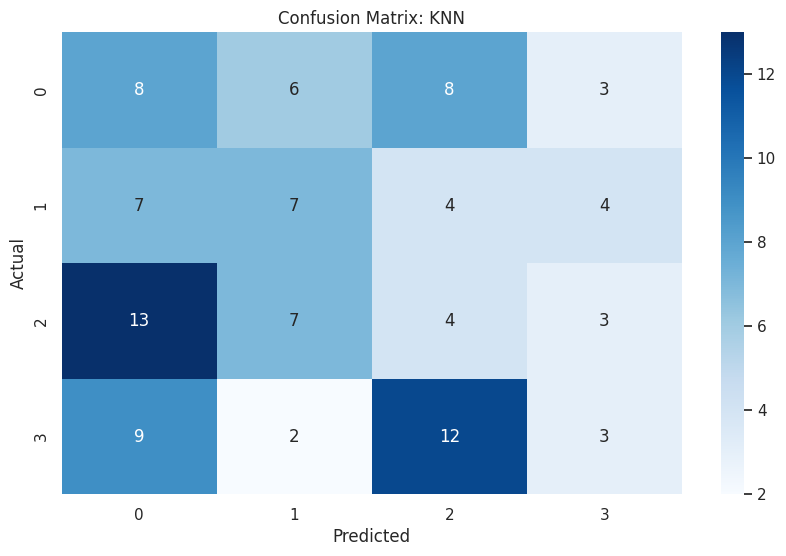

--- XGBoost ---
Accuracy: 0.28
Classification Report:
              precision    recall  f1-score   support

           0       0.17      0.16      0.16        25
           1       0.33      0.27      0.30        22
           2       0.40      0.44      0.42        27
           3       0.21      0.23      0.22        26

    accuracy                           0.28       100
   macro avg       0.28      0.28      0.28       100
weighted avg       0.28      0.28      0.28       100



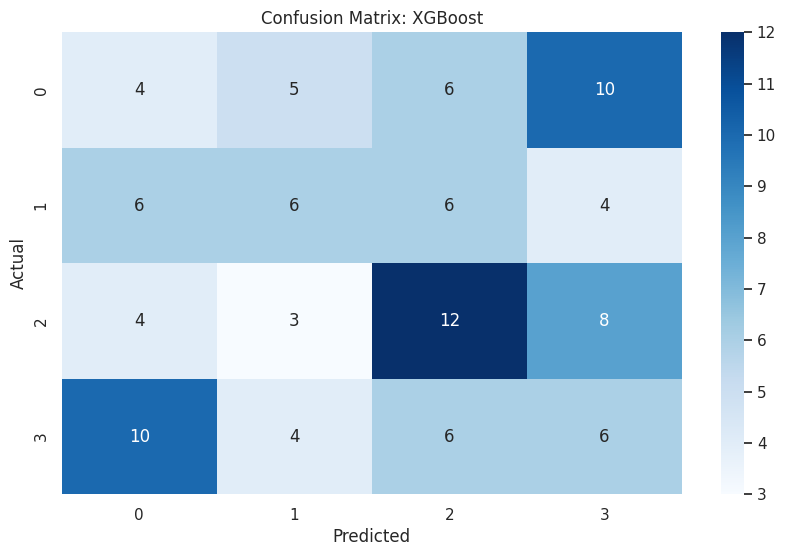

In [25]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    acc = accuracy_score(y_test, preds)
    cm = confusion_matrix(y_test, preds)
    
    results[name] = {
        "accuracy": acc,
        "confusion_matrix": cm,
        "report": classification_report(y_test, preds, output_dict=True)
    }

    print(f"--- {name} ---")
    print("Accuracy:", round(acc, 4))
    print("Classification Report:")
    print(classification_report(y_test, preds))
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


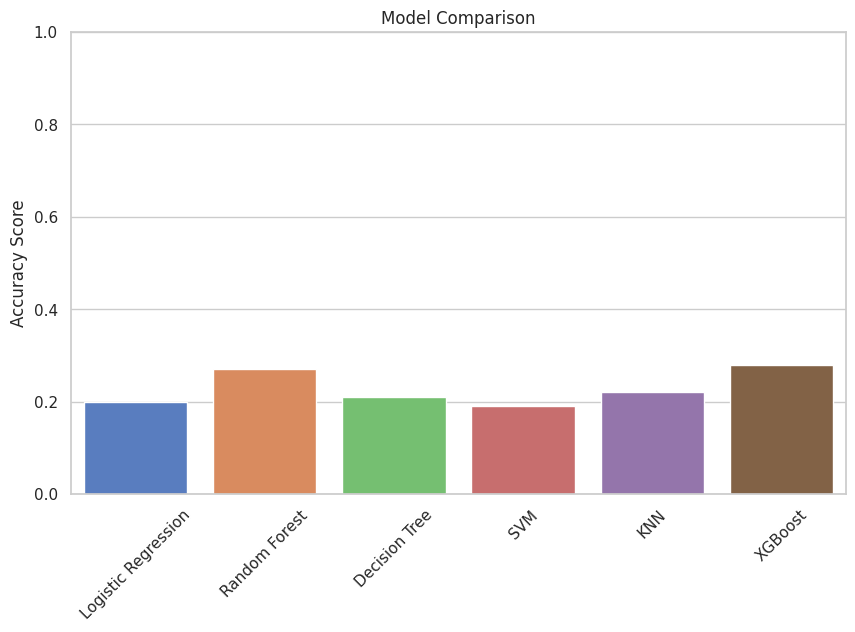

In [26]:
accuracy_data = {name: res["accuracy"] for name, res in results.items()}

sns.barplot(x=list(accuracy_data.keys()), y=list(accuracy_data.values()))
plt.ylabel("Accuracy Score")
plt.title("Model Comparison")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()


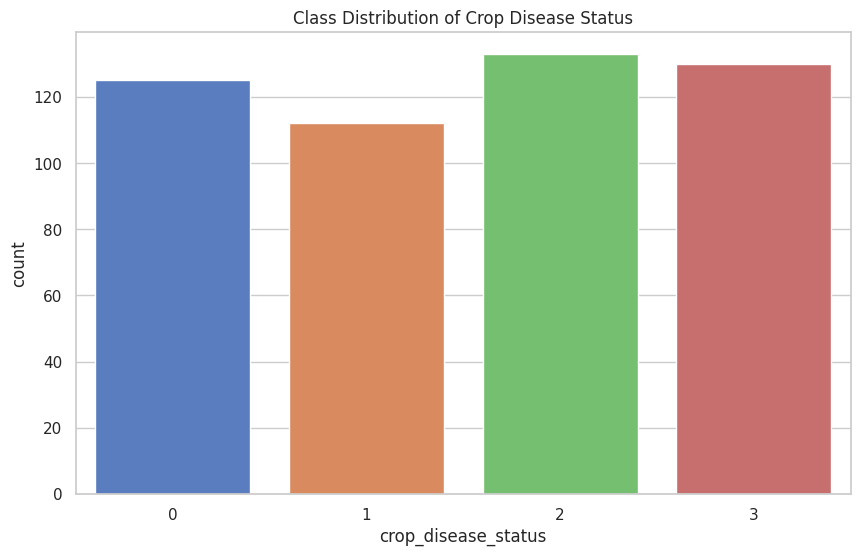

crop_disease_status
2    0.266
3    0.260
0    0.250
1    0.224
Name: proportion, dtype: float64


In [27]:
sns.countplot(x=y)
plt.title("Class Distribution of Crop Disease Status")
plt.show()
print(y.value_counts(normalize=True))


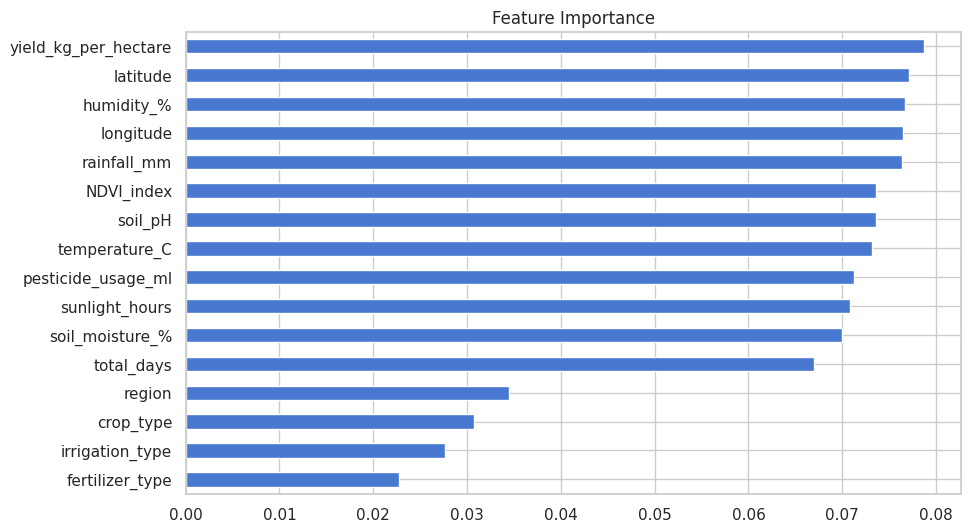

In [28]:
importances = RandomForestClassifier().fit(X_scaled, y).feature_importances_
feat_importance = pd.Series(importances, index=X.columns)
feat_importance.sort_values().plot(kind='barh', figsize=(10, 6), title='Feature Importance')
plt.show()


In [29]:
y_binary = df_cleaned['crop_disease_status'].apply(lambda x: 0 if x == 'None' else 1)


In [30]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=3)
grid.fit(X_train, y_train)
print("Best Score:", grid.best_score_)
print("Best Params:", grid.best_params_)


Best Score: 0.2499719447873415
Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


In [31]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
print("MLP Accuracy:", accuracy_score(y_test, y_pred))


MLP Accuracy: 0.2


## Thank you..pls upvote